In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files 
uploaded=files.upload()

Saving bank-full (1).csv to bank-full (1).csv


In [7]:
df=pd.read_csv("bank-full (1).csv",';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df.shape

(45211, 17)

In [16]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [20]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [21]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [22]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [23]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [24]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [25]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [26]:
df['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [27]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [33]:
df['balance']=pd.cut(df['balance'],bins=[ -8019,0,10000,20000,30000,40000,50000,102127],labels=[0,1,2,3,4,5,6])
df['balance']

0        1
1        1
2        1
3        1
4        1
        ..
45206    1
45207    1
45208    1
45209    1
45210    1
Name: balance, Length: 45211, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [34]:
df['balance'].value_counts()

1    37931
0     7279
2        0
3        0
4        0
5        0
6        0
Name: balance, dtype: int64

In [35]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
df['duration']=pd.cut(df['duration'],bins=[0,1000,2000,3000,4000,5000],labels=[0,1,2,3,4])
df['duration']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    1
45209    0
45210    0
Name: duration, Length: 45211, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [37]:
df['duration'].value_counts()

0    44150
1      999
2       45
3       13
4        1
Name: duration, dtype: int64

In [38]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      1
housing      0
loan         0
contact      0
day          0
month        0
duration     3
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

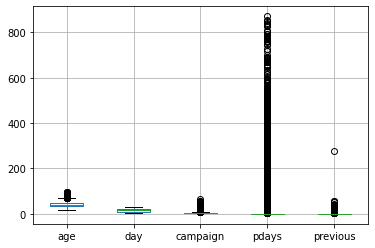

In [39]:
df.boxplot()

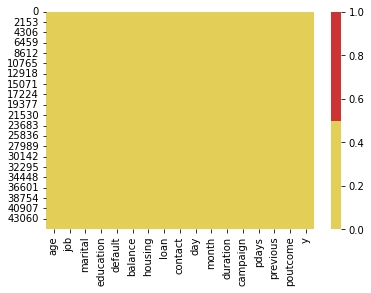

In [40]:
import seaborn as sns
cols = df.columns
colours = [	'#E3CF57', '#CD3333'] 
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

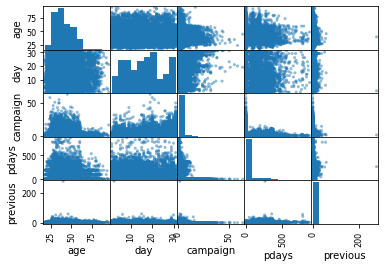

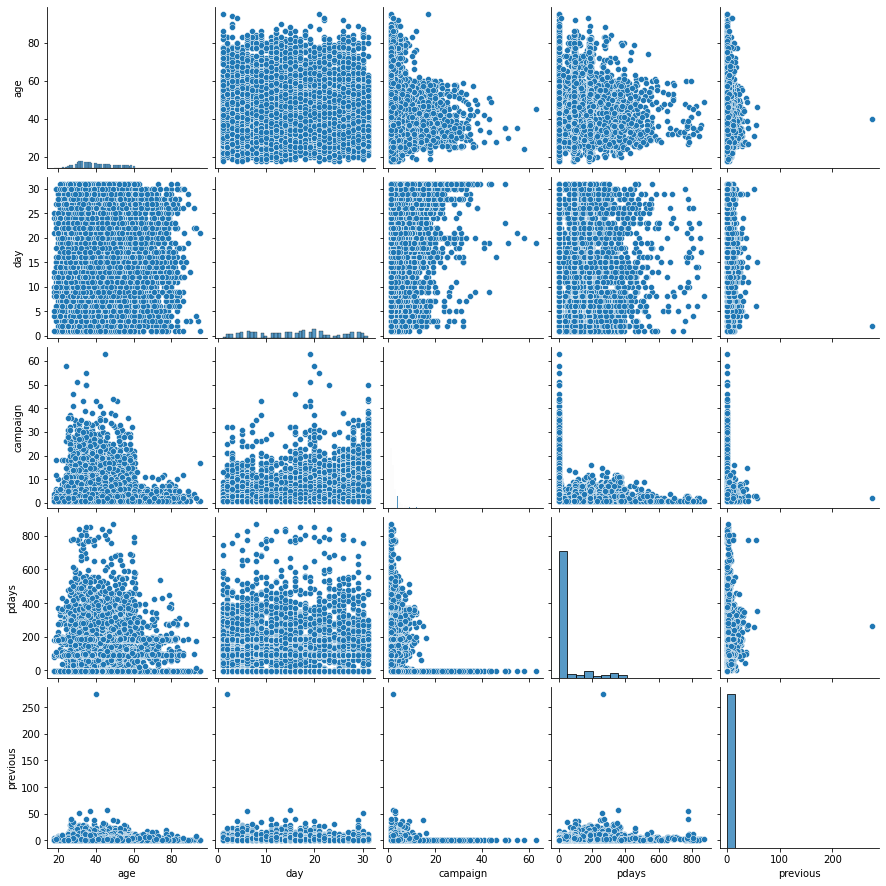

In [41]:
pd.plotting.scatter_matrix(df)
sns.pairplot(df)

In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,1,yes,no,unknown,5,may,0,1,-1,0,unknown,no
1,44,technician,single,secondary,no,1,yes,no,unknown,5,may,0,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,1,yes,yes,unknown,5,may,0,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1,yes,no,unknown,5,may,0,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,0,1,-1,0,unknown,no


In [43]:
df=df.drop(columns=['campaign','pdays','previous','poutcome','contact'],axis=1)

In [62]:
df=df[['y','age','job','marital','education','default','balance','housing','loan','day','month','duration']]

In [97]:
df.head()

,y,age,job,marital,education,default,balance,housing,loan,day,month,duration
0,no,58,management,married,tertiary,no,1,yes,no,5,may,0
1,no,44,technician,single,secondary,no,1,yes,no,5,may,0
2,no,33,entrepreneur,married,secondary,no,1,yes,yes,5,may,0
3,no,47,blue-collar,married,unknown,no,1,yes,no,5,may,0
4,no,33,unknown,single,unknown,no,1,no,no,5,may,0


In [109]:
bank=pd.get_dummies(df,columns=['job','marital','education','default','balance','housing','loan','day','month','duration'])

In [110]:
bank.head()

,y,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4
0,no,58,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,no,44,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,no,33,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,no,47,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,no,33,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [111]:
label_encoder = preprocessing.LabelEncoder()
bank['y']=label_encoder.fit_transform(bank['y'])

In [112]:
bank.head()

,y,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4
0,0,58,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,44,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,33,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,47,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,33,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Text(0, 0.5, 'y')

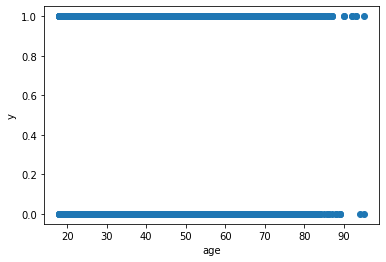

In [118]:
plt.scatter(bank['age'],bank['y'])
plt.xlabel("age")
plt.ylabel("y")

In [121]:
bank.describe()

,y,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.116985,40.936210,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,...,0.010551,0.304483,0.087810,0.016323,0.012807,0.976532,0.022096,0.000995,0.000288,0.000022
std,0.321406,10.618762,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,...,0.102174,0.460193,0.283022,0.126718,0.112441,0.151385,0.146999,0.031534,0.016955,0.004703
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


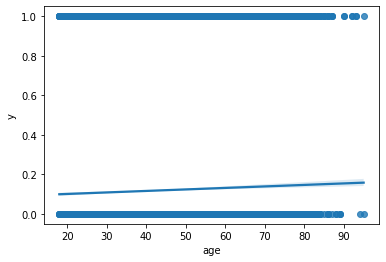

In [124]:
import seaborn as sns
sns.regplot(x="age",y="y",data=bank)

In [104]:
X=bank.iloc[:,1:]
Y=bank.iloc[:,0]

In [105]:
X

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_mar,month_may,month_nov,month_oct,month_sep,duration_0,duration_1,duration_2,duration_3,duration_4
0,58,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,44,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,33,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,47,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
45207,71,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
45208,72,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
45209,57,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [70]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [71]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

model building

In [76]:
model=LogisticRegression()

In [77]:
model.fit(X,Y)

LogisticRegression()

In [79]:
Y_model=model.predict(X)

In [81]:
Y_pred_df=pd.DataFrame({"Actaual_Y":Y,"Predicted_Y":Y_model})

In [82]:
Y_pred_df

,Actaual_Y,Predicted_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


In [85]:
confusion_matrix = confusion_matrix(Y,Y_model)

In [86]:
confusion_matrix

array([[39207,   715],
       [ 4447,   842]])

In [88]:
accuracy_score(Y,Y_model)

0.8858242463117383

In [90]:
print(classification_report(Y,Y_model))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.54      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

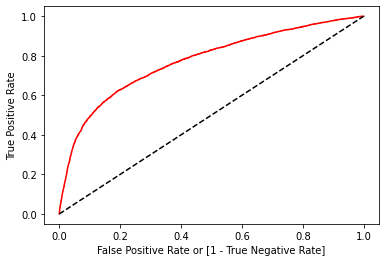

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_model)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')